# Face Recognition

In this notebook let's build a face recognition model for some famous faces using an artificial neural network and see how it performs.

One caveat, since these are images, we should be using a convolutional neural network but I won't talk about those until next week. I think the ANN might do ok

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf     #pip install tensorflow
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

fetch_lfw_people can get us these images. We will take all the people in the dataset that have at least 60 images of that person. This may take a while to run as it will download the images

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60, resize=1)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 125, 94)


So we have 8 different people to train our model on and 1348 total images. The image resolution is 125x94

I'm deliberately picking faces.images over faces.data here due to the shape

In [3]:
X = faces.images
y = faces.target
print(y)
numberofclasses = np.unique(y).size
print("numberofclasses: ", numberofclasses)

[1 3 3 ... 7 3 5]
numberofclasses:  8


In [4]:
X[0]

array([[0.5254902 , 0.5176471 , 0.5058824 , ..., 0.25882354, 0.25882354,
        0.25490198],
       [0.5385621 , 0.5424837 , 0.54901963, ..., 0.2653595 , 0.26143792,
        0.25882354],
       [0.5542484 , 0.5660131 , 0.5660131 , ..., 0.2627451 , 0.26143792,
        0.2640523 ],
       ...,
       [0.25620916, 0.52679735, 0.71895427, ..., 0.00653595, 0.00653595,
        0.        ],
       [0.19738562, 0.44183007, 0.6640523 , ..., 0.00653595, 0.00261438,
        0.        ],
       [0.1267974 , 0.34640524, 0.56993467, ..., 0.00653595, 0.00261438,
        0.        ]], dtype=float32)

All values are between 0 and 1 so greyscale. No need to do any /255 like we did in the digits dataset

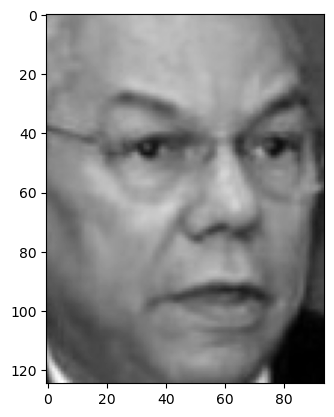

In [17]:
plt.imshow(X[0], cmap="gray")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1138)

Things to remember
- If the training loss is too high (or training accuracy is too low) this means your model is underfit and you may need a more complicated model
- If the validation loss is too high, while training loss is too low, your model is overfit. Maybe do less epochs, use early stopping, apply some form of regularisation
- Stanford ML course does say "don't use number of layers or units as a regularisation", i.e. don't just make the model simpler because of overfitting, apply regularisation instead

To start with I'm going with 3 hidden layers, each with 100 units. I also need to flatten the input as well.

The output layer needs as many units as the number of classes. 

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(125, 94)))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(numberofclasses))

In [8]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11750)             0         
                                                                 
 dense (Dense)               (None, 100)               1175100   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 8)                 808       
                                                                 
Total params: 1196108 (4.56 MB)
Trainable params: 1196108 (4.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Over a million parameters to train

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [10]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
26/26 [==============================] - 2s 32ms/step - loss: 2.1577 - accuracy: 0.3515 - val_loss: 1.7389 - val_accuracy: 0.3744
Epoch 2/100
26/26 [==============================] - 1s 21ms/step - loss: 1.7660 - accuracy: 0.4035 - val_loss: 1.9340 - val_accuracy: 0.3744
Epoch 3/100
26/26 [==============================] - 1s 23ms/step - loss: 1.7219 - accuracy: 0.4270 - val_loss: 1.8880 - val_accuracy: 0.4483
Epoch 4/100
26/26 [==============================] - 1s 21ms/step - loss: 1.5967 - accuracy: 0.4765 - val_loss: 1.5226 - val_accuracy: 0.5172
Epoch 5/100
26/26 [==============================] - 1s 22ms/step - loss: 1.4771 - accuracy: 0.4963 - val_loss: 1.4655 - val_accuracy: 0.5172
Epoch 6/100
26/26 [==============================] - 1s 24ms/step - loss: 1.3579 - accuracy: 0.5297 - val_loss: 1.8712 - val_accuracy: 0.3596
Epoch 7/100
26/26 [==============================] - 1s 22ms/step - loss: 1.5928 - accuracy: 0.4542 - val_loss: 1.3942 - val_accuracy: 0.5222
Epoch 

Look at that training accuracy. 

Validation is much lower so overfitting :(

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11750)             0         
                                                                 
 dense (Dense)               (None, 100)               1175100   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 8)                 808       
                                                                 
Total params: 1196108 (4.56 MB)
Trainable params: 1196108 (4.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 4ms/step - loss: 1.6476 - accuracy: 0.7151


[1.6475697755813599, 0.715133547782898]

Let's plot the accuracy

In [13]:
def plot_loss(history, which='loss'):
    plt.plot(history.history[which], label='train')
    try:
        plt.plot(history.history['val_'+which], label='validation')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel(which)
    plt.legend()
    plt.grid(True)

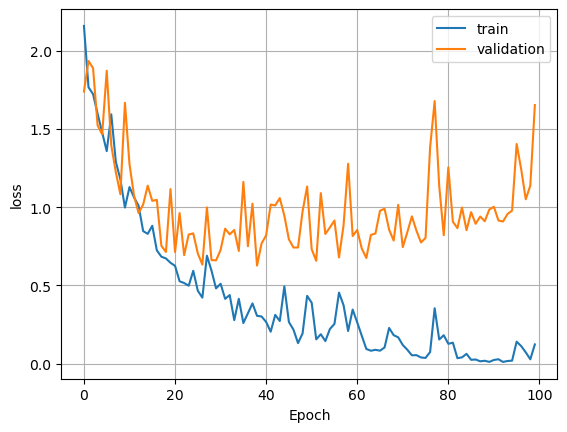

In [14]:
plot_loss(history)

In [15]:
X_train[0].shape

(125, 94)

Now you can try out different networks.

Do different number of layers and units, what were the rules of thumb of I talked about previously? Try those

How about implementing some form of regularisation on the layers? Would this help?

How about using early stopping so it doesn't go for so many epochs?

Try different things and see if you can come up with a better network for this data